<a href="https://colab.research.google.com/github/thiagohrcosta/ML-Number/blob/main/ml_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install utils
import numpy
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.layers import Dropout
from keras.utils import to_categorical


  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=85bb3ca89bf52575eefb7994c509299854002ac79cfc8eb8c423ec2be193a74e
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [2]:
# loading the Mnist dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Print the vector size
print(X_train.shape)

(60000, 28, 28)


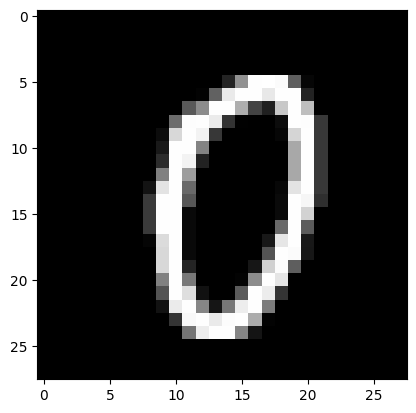

In [4]:
first_image = X_train[1000]
first_image = numpy.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [5]:
# Answer
print(y_train[1000])

0


In [6]:
# pixel total sum
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [7]:
# Transform pixels
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
print(first_image)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   36. 146. 254. 255. 251.  95.   6.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  97.
  234. 254. 254. 232. 254. 254.  35.   0.   0.   0.   0.  

In [9]:
# Transform values to 0 and 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

In [10]:
print(X_train2[100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# Transforming values from train
y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)
print(y_train[1001])
print(y_train_h[1001])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
num_classes = y_test_h.shape[1]

In [13]:
# feed-forward
model = Sequential()

# Create the input layer
model.add(InputLayer(input_shape=num_pixels))

# Create the first network layer
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))

# Second network layer
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))

# Exit layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

In [14]:
# Print informations about the created model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 2923530 (11.15 MB)
Trainable params: 2923530 (11.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Created model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Model Training
result = model.fit(X_train2, y_train_h, validation_data=(X_test2, y_test_h), epochs=20, verbose=1, batch_size=100)


Epoch 1/20
600/600 [==============================] - 61s 99ms/step - loss: 0.1797 - accuracy: 0.9445 - val_loss: 0.0905 - val_accuracy: 0.9702
Epoch 2/20
600/600 [==============================] - 55s 92ms/step - loss: 0.0698 - accuracy: 0.9782 - val_loss: 0.0769 - val_accuracy: 0.9763
Epoch 3/20
600/600 [==============================] - 54s 90ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0827 - val_accuracy: 0.9766
Epoch 4/20
600/600 [==============================] - 53s 89ms/step - loss: 0.0379 - accuracy: 0.9871 - val_loss: 0.0884 - val_accuracy: 0.9730
Epoch 5/20
600/600 [==============================] - 55s 91ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0807 - val_accuracy: 0.9793
Epoch 6/20
600/600 [==============================] - 55s 93ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0916 - val_accuracy: 0.9772
Epoch 7/20
600/600 [==============================] - 57s 94ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0805 - val_accuracy: